In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.0

## Train dataset

In [3]:
df_train = pd.read_csv('./pointcloud_feature/train_cluster.csv')
df_train

,name,zncc_90_dx,zncc_90_dy,zncc_90_dz,zncc_50_dx,zncc_50_dy,zncc_50_dz,centroid_50,centroid_90,video_num,pr_k,test_score,score,cluster
0,akiyama,0.465780,0.402957,0.389172,0.132364,0.244541,0.337340,15.095633,32.455948,1,1.00,4,1.00,1
1,hirai,0.595902,0.559260,0.416372,0.137693,0.126099,0.315228,21.669062,44.831531,1,0.75,3,0.75,1
2,kudo,0.548617,0.526285,0.456227,0.155550,0.199395,0.416809,68.565885,372.028586,1,0.75,3,0.75,1
3,luqman,0.405367,0.424116,0.401714,0.145600,0.256687,0.347286,31.278970,57.554050,1,1.00,4,1.00,1
4,negishi,0.463802,0.436987,0.416048,0.191186,0.287729,0.368006,18.707299,33.179057,1,0.00,3,0.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,sone,0.445131,0.442574,0.421530,0.178120,0.286135,0.369874,35.803381,59.218091,4,0.50,7,0.25,2
57,sugano,0.453471,0.485776,0.341975,0.132099,0.093711,0.242645,20.069963,36.064296,4,0.75,7,1.00,1
58,suzuki,0.450009,0.441276,0.409442,0.187537,0.299051,0.351426,45.474514,80.647256,4,0.25,6,0.50,0
59,tsuruta,0.608316,0.553448,0.424812,0.139523,0.137551,0.334009,27.172228,54.922726,4,0.75,7,0.75,1


In [4]:
# cluster列削除
cols_to_drop = ['cluster']  # 削除する列名を指定
df_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')
# df_train.head()

# name列をID列に変更し、整数を順に割り当てる
if 'name' in df_train.columns:
    df_train.rename(columns={'name': 'ID'}, inplace=True)
    df_train['ID'] = range(len(df_train)) 

df_train.head()

,ID,zncc_90_dx,zncc_90_dy,zncc_90_dz,zncc_50_dx,zncc_50_dy,zncc_50_dz,centroid_50,centroid_90,video_num,pr_k,test_score,score
0,0,0.465780,0.402957,0.389172,0.132364,0.244541,0.337340,15.095633,32.455948,1,1.00,4,1.00
1,1,0.595902,0.559260,0.416372,0.137693,0.126099,0.315228,21.669062,44.831531,1,0.75,3,0.75
2,2,0.548617,0.526285,0.456227,0.155550,0.199395,0.416809,68.565885,372.028586,1,0.75,3,0.75
3,3,0.405367,0.424116,0.401714,0.145600,0.256687,0.347286,31.278970,57.554050,1,1.00,4,1.00
4,4,0.463802,0.436987,0.416048,0.191186,0.287729,0.368006,18.707299,33.179057,1,0.00,3,0.25


In [5]:
# クラスタリングに使用する列
cluster_columns = ['pr_k', 'score', 'test_score']

# 対象列が存在することを確認
print("使用する列:", cluster_columns)
print("データセットに存在するか:", all(col in df_train.columns for col in cluster_columns))

使用する列: ['pr_k', 'score', 'test_score']
データセットに存在するか: True


In [6]:
#正規化
scaler = MinMaxScaler()

# データのコピーを作成してスケーリングを実施
df_train_scaled = df_train.copy()
df_train_scaled[cluster_columns] = scaler.fit_transform(df_train[cluster_columns])
df_train_scaled.head()

,ID,zncc_90_dx,zncc_90_dy,zncc_90_dz,zncc_50_dx,zncc_50_dy,zncc_50_dz,centroid_50,centroid_90,video_num,pr_k,test_score,score
0,0,0.465780,0.402957,0.389172,0.132364,0.244541,0.337340,15.095633,32.455948,1,1.00,0.4,1.00
1,1,0.595902,0.559260,0.416372,0.137693,0.126099,0.315228,21.669062,44.831531,1,0.75,0.2,0.75
2,2,0.548617,0.526285,0.456227,0.155550,0.199395,0.416809,68.565885,372.028586,1,0.75,0.2,0.75
3,3,0.405367,0.424116,0.401714,0.145600,0.256687,0.347286,31.278970,57.554050,1,1.00,0.4,1.00
4,4,0.463802,0.436987,0.416048,0.191186,0.287729,0.368006,18.707299,33.179057,1,0.00,0.2,0.25


In [7]:
# クラスタリングに使用する特徴量を抽出
features = df_train_scaled[cluster_columns]

# k-meansの実行
k = 3
kmeans_full = KMeans(n_clusters=k, random_state=42).fit(features)

# クラスタリング結果をデータフレームに追加
df_train_scaled['cluster_benchmark'] = kmeans_full.labels_

# IDごとにクラスタを保持（'ID'列が存在する前提）
benchmark_clusters = df_train_scaled[['ID', 'cluster_benchmark']].copy() if 'ID' in df_train_scaled.columns else df_train_scaled[['cluster_benchmark']].copy()

benchmark_clusters

,ID,cluster_benchmark
0,0,0
1,1,0
2,2,0
3,3,0
4,4,2
...,...,...
56,56,1
57,57,0
58,58,1
59,59,0


## パターン2　video_numごとに選択

In [8]:
# # video_numごとにランダムで2つデータを選択肢、k-meansを実行
# # 試行回数はvideo_num(4)*3=12回
# trial_results = []

# # 各 video_num グループごとに処理を実行
# for v in sorted(df_train_scaled['video_num'].unique()):
#     # video_num が v のデータを抽出
#     group = df_train_scaled[df_train_scaled['video_num'] == v]
#     group_indices = list(group.index)
    
#     # グループ内からランダムに2つの異なるデータを選択（データ数が2未満なら可能な限り選択）
#     sample_size = min(3, len(group_indices))
#     sampled_indices = random.sample(group_indices, sample_size)
#     print(f'video_num: {v}')
    
#     # 選ばれた各データについて処理を実行
#     for idx in sampled_indices:
#         print(f"ID: {idx}")
#         # インデックス idx の行を除外して新しいデータセットを作成
#         df_trial = df_train_scaled.drop(index=idx).copy()
        
#         # k-means を実施
#         kmeans_trial = KMeans(n_clusters=k, random_state=42).fit(df_trial[cluster_columns])
#         df_trial['trial_cluster'] = kmeans_trial.labels_
        
#         # 試行結果を保存
#         trial_results.append({
#             'removed_index': idx,
#             'video_num': v,
#             'trial_data': df_trial[['ID', 'trial_cluster']].copy()
#         })


In [9]:
# variation_counts = []

# for result in trial_results:
#     trial_df = result['trial_data']
#     # 'ID' をキーにしてベンチマーク結果とマージ
#     merged = trial_df.merge(benchmark_clusters, on='ID', how='left')
#     # クラスタの変動数を計算
#     changed = (merged['trial_cluster'] != merged['cluster_benchmark']).sum()
#     variation_counts.append(changed)

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(variation_counts)+1), variation_counts, marker='o')
# plt.title("各試行におけるクラスタ変動数", fontname="MS Gothic")
# plt.xlabel("試行番号", fontname="MS Gothic")
# plt.ylabel("ベンチマークと異なるクラスタの数", fontname="MS Gothic")
# plt.xticks(range(1, len(variation_counts)+1))
# plt.show()

### パターン1: ランダム選択

In [10]:
# # ランダムで1つデータを省いて再度クラスタリング
# num_trials = 10  # 試行回数を指定

# trial_results = []

# for trial in range(num_trials):
#     remove_index = random.choice(df_train_scaled.index)
#     print(remove_index)
    
#     df_trial = df_train_scaled.drop(index=remove_index).copy()
    
#     kmeans_trial = KMeans(n_clusters=k, random_state=42).fit(df_trial[cluster_columns])
    
#     df_trial['trial_cluster'] = kmeans_trial.labels_
    
#     trial_results.append({
#         'removed_index': remove_index,
#         'trial_data': df_trial[['ID', 'trial_cluster']].copy() if 'ID' in df_trial.columns else df_trial[['trial_cluster']].copy()
#     })

In [11]:
# variation_counts = []

# for result in trial_results:
#     trial_df = result['trial_data']
#     if 'ID' in trial_df.columns:
#         merged = trial_df.merge(benchmark_clusters, on='ID', how='left')
#     else:
#         merged = trial_df.copy()
#         merged['cluster_benchmark'] = benchmark_clusters['cluster_benchmark'].values
    
#     changed = (merged['trial_cluster'] != merged['cluster_benchmark']).sum()
#     variation_counts.append(changed)

# plt.figure(figsize=(12, 8))
# plt.plot(range(1, num_trials+1), variation_counts, marker='o')
# plt.title("各試行におけるクラスタ変動数", fontname="MS Gothic")
# plt.xlabel("試行回数", fontname="MS Gothic")
# plt.ylabel("ベンチマークと異なるクラスタの数", fontname="MS Gothic")
# plt.xticks(range(1, num_trials+1))
# plt.show()


### パターン3: 試行i回をj回実行

In [25]:
# 内側のループ回数 (i回の試行を何回繰り返すか)
num_i = 10  
# 外側のループ回数 (j回繰り返す)
num_j = 10  

all_variation_counts = []  # 各jにおけるi回の変動数リストを保持するリスト

for j in range(num_j):
    variation_counts = []  # 現在のj回目の各i試行の変動数を保持するリスト
    
    for i in range(num_i):
        # ランダムに1行を選んで除外
        remove_index = random.choice(df_train_scaled.index)
        
        # 選択された行を除いたデータを作成
        df_trial = df_train_scaled.drop(index=remove_index).copy()
        
        # k-meansを実施
        kmeans_trial = KMeans(n_clusters=k, random_state=42).fit(df_trial[cluster_columns])
        
        # クラスタラベルを保存
        df_trial['trial_cluster'] = kmeans_trial.labels_
        
        # 試行結果をIDごとに保存
        if 'ID' in df_trial.columns:
            trial_data = df_trial[['ID', 'trial_cluster']].copy()
        else:
            trial_data = df_trial[['trial_cluster']].copy()
        
        # ベンチマークと比較してクラスタが変わった数を計算
        if 'ID' in trial_data.columns:
            merged = trial_data.merge(benchmark_clusters, on='ID', how='left')
        else:
            merged = trial_data.copy()
            merged['cluster_benchmark'] = benchmark_clusters['cluster_benchmark'].values
        
        changed = (merged['trial_cluster'] != merged['cluster_benchmark']).sum()
        variation_counts.append(changed)
    
    # j回目の試行終了後、変動数リストを保存
    all_variation_counts.append(variation_counts)


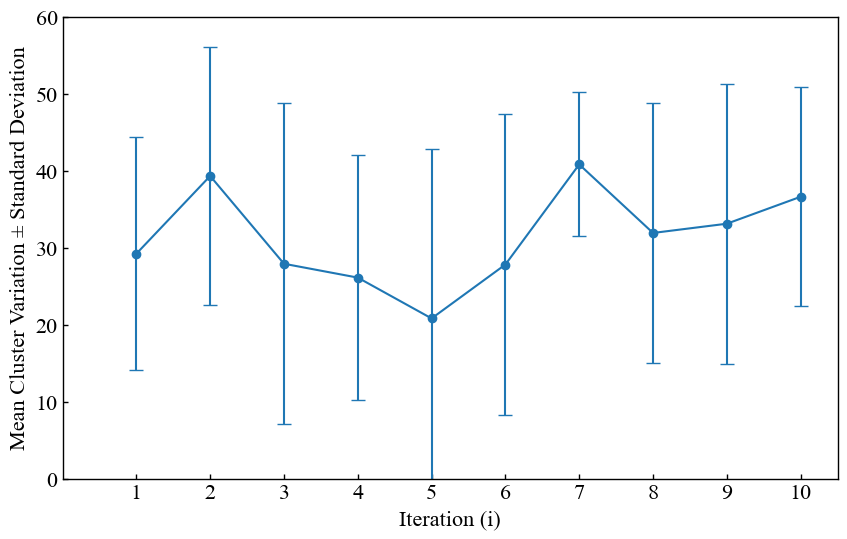

In [26]:
# all_variation_countsはリストのリストで、形状は (num_j, num_i) になります
variations_array = np.array(all_variation_counts)  # shape: (num_j, num_i)

# 各i回目について、j回分の統計量を計算
mean_variations = variations_array.mean(axis=0)  # iごとの平均
std_variations = variations_array.std(axis=0)    # iごとの標準偏差

# i回ごとのクラスタ変動数の統計値をエラーバー付きで可視化
i_range = range(1, num_i + 1)
plt.figure(figsize=(10, 6))
plt.errorbar(i_range, mean_variations, yerr=std_variations, marker='o', capsize=5, linestyle='-')
# plt.title("クラスタ変動数の統計値", fontname="MS Gothic")
plt.xlabel("Iteration (i)")
plt.ylabel("Mean Cluster Variation ± Standard Deviation")
plt.xlim(0, 10.5)
plt.ylim(0, 60)
plt.xticks(i_range)
plt.show()


## Test dataset

In [14]:
df_test_prior = pd.read_csv('./pointcloud_feature/test_cluster_prior.csv')
df_test = pd.read_csv('./pointcloud_feature/test_cluster.csv')

display(df_test_prior)
display(df_test)

,name,zncc_90_dx,zncc_90_dy,zncc_90_dz,zncc_50_dx,zncc_50_dy,zncc_50_dz,centroid_50,centroid_90,pr_k,test_score,score,cluster
0,hirai,0.378604,0.297439,0.339244,0.157051,0.133420,0.221548,35.378948,92.277248,0.75,NaN,0.75,2
1,kudo,0.342177,0.254183,0.311187,0.211934,0.126757,0.226062,23.029051,45.368420,1.00,NaN,1.00,1
2,sato,0.360148,0.418768,0.372218,0.144148,0.235474,0.279285,28.164278,48.629438,0.50,NaN,0.75,0
3,sone,0.412274,0.407073,0.388513,0.106369,0.219260,0.338741,38.010487,77.429245,0.75,NaN,1.00,1
4,tsuruta,0.355541,0.237412,0.302305,0.192563,0.146531,0.246542,32.750639,52.442912,0.50,NaN,0.75,0
5,teraoka,0.381750,0.275925,0.262865,0.097925,0.060634,0.132349,27.626422,52.940098,0.75,NaN,0.75,2


,ID,zncc_50_dz,zncc_90_dz,zncc_50_dx,zncc_90_dx,zncc_50_dy,zncc_90_dy,centroid_50,centroid_90,cluster
0,hirai,0.254832,0.379771,0.252540,0.390143,0.188492,0.278033,47.568157,109.054695,2
1,sato,0.312681,0.603178,0.250023,0.518122,0.324341,0.551519,26.568934,52.295199,0
2,teraoka,0.217529,0.322244,0.219900,0.324844,0.125069,0.203940,37.140972,77.824612,2
3,tsuruta,0.213186,0.299698,0.207456,0.299672,0.140876,0.217222,36.602751,68.417854,0
4,sone,0.425019,0.558330,0.171481,0.491348,0.249167,0.461485,37.652420,66.721496,1
5,kudo,0.273436,0.368801,0.315851,0.386731,0.227128,0.322229,17.650997,34.126466,1
6,shiraishi,0.209598,0.270362,0.074491,0.426851,0.066554,0.553285,30.768213,53.223859,1
7,sato_s,0.198230,0.303892,0.167359,0.539643,0.174209,0.655801,24.133017,54.788292,1
8,yamamoto,0.317174,0.394601,0.220082,0.646060,0.297129,0.757636,20.720304,40.194771,1
9,kameoka,0.305265,0.415461,0.181651,0.625078,0.208137,0.735975,25.645038,58.185299,0


In [15]:
df_test_prior.rename(columns={'name': 'ID'}, inplace=True)
df_test_prior

,ID,zncc_90_dx,zncc_90_dy,zncc_90_dz,zncc_50_dx,zncc_50_dy,zncc_50_dz,centroid_50,centroid_90,pr_k,test_score,score,cluster
0,hirai,0.378604,0.297439,0.339244,0.157051,0.133420,0.221548,35.378948,92.277248,0.75,NaN,0.75,2
1,kudo,0.342177,0.254183,0.311187,0.211934,0.126757,0.226062,23.029051,45.368420,1.00,NaN,1.00,1
2,sato,0.360148,0.418768,0.372218,0.144148,0.235474,0.279285,28.164278,48.629438,0.50,NaN,0.75,0
3,sone,0.412274,0.407073,0.388513,0.106369,0.219260,0.338741,38.010487,77.429245,0.75,NaN,1.00,1
4,tsuruta,0.355541,0.237412,0.302305,0.192563,0.146531,0.246542,32.750639,52.442912,0.50,NaN,0.75,0
5,teraoka,0.381750,0.275925,0.262865,0.097925,0.060634,0.132349,27.626422,52.940098,0.75,NaN,0.75,2


In [16]:
# IDをキーにして内側結合を行うことで、共通するIDの行のみ抽出
merged_df = df_test.merge(df_test_prior[['ID', 'cluster']], on='ID', suffixes=('_test', '_prior'))

# 結果を確認
merged_df.head()

,ID,zncc_50_dz,zncc_90_dz,zncc_50_dx,zncc_90_dx,zncc_50_dy,zncc_90_dy,centroid_50,centroid_90,cluster_test,cluster_prior
0,hirai,0.254832,0.379771,0.252540,0.390143,0.188492,0.278033,47.568157,109.054695,2,2
1,sato,0.312681,0.603178,0.250023,0.518122,0.324341,0.551519,26.568934,52.295199,0,0
2,teraoka,0.217529,0.322244,0.219900,0.324844,0.125069,0.203940,37.140972,77.824612,2,2
3,tsuruta,0.213186,0.299698,0.207456,0.299672,0.140876,0.217222,36.602751,68.417854,0,0
4,sone,0.425019,0.558330,0.171481,0.491348,0.249167,0.461485,37.652420,66.721496,1,1


In [17]:
# クラスタが一致しているかどうかを示す新しい列を作成
merged_df['match'] = merged_df['cluster_test'] == merged_df['cluster_prior']

# 一致率を計算
total_common = len(merged_df)
num_matches = merged_df['match'].sum()
match_rate = num_matches / total_common

print(f"共通ID数: {total_common}")
print(f"一致するクラスタの数: {num_matches}")
print(f"クラスタ一致率: {match_rate:.2%}")


共通ID数: 6
一致するクラスタの数: 6
クラスタ一致率: 100.00%


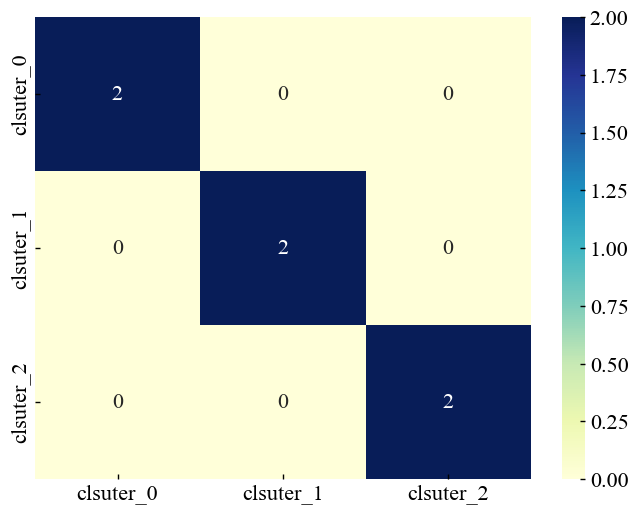

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# df_test と df_test_prior のクラスタ列を用いて混同行列を計算
conf_matrix = confusion_matrix(merged_df['cluster_prior'], merged_df['cluster_test'])

# 混同行列をDataFrameに変換（任意：ラベル付けが容易になります）
conf_df = pd.DataFrame(conf_matrix, 
                       index=[f'clsuter_{i}' for i in range(conf_matrix.shape[0])],
                       columns=[f'clsuter_{i}' for i in range(conf_matrix.shape[1])])

# ヒートマップで可視化
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="YlGnBu")
# plt.title("クラスタの混同行列", fontname="MS Gothic")
# plt.ylabel("追加データ取得前のクラスタ", fontname="MS Gothic")
# plt.xlabel("追加データ取得後のクラスタ", fontname="MS Gothic")
plt.show()
